<a href="https://colab.research.google.com/github/dipmay-biswas/Soft-Computing-laboratory/blob/master/2021CSB043_assignment2c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fuzzy Logic\
Dipmay Biswas\
2021CSB043

In [1]:
import numpy as np
def membership_temperature(x):
     if x<30:
         return 0,"excellent"
     elif x>=30 and x<50:
         return (x - 30)/(50 - 30),"excellent"
     elif x>=50 and x<80:
         return (x - 50)/(80 - 50),"average"
     elif x>=80 and x<120:
         return (x - 80)/(120 - 80),"risky"
     else:
         return 1,"risky"

temp,attr=membership_temperature(86)
print(temp)
print(attr)

0.15
risky


In [2]:
def membership_fanspeed_slow(x):
     if x<30:
         return 1
     elif x>=30 and x<50:
         return 1-((x - 30)/(50 - 30))
     else:
         return 0

def membership_fanspeed_moderate(x):
     if x<30:
         return 0
     elif x>=30 and x<50:
         return (1-(x - 30)/(50 - 30))*(x - 30)/(50 - 30)
     elif x==50:
         return 0.05
     elif x>50 and x<80:
         if x<=65:
             return (x - 50)/(65 - 50)
         else:
             return 1-((x - 65)/(80 - 65))
     elif x==80:
         return 0.045
     elif x>80 and x<120:
         return (1-((x - 80)/(120 - 80)))*((x - 80)/(120 - 80))
     else:
         return 0

def membership_fanspeed_high(x):
     if x<80:
         return 0
     elif x==80:
         return 0.05
     elif x>80 and x<120:
        return (x - 80)/(120 - 80)
     else:
         return 1

def fuzzyrule(temperature):
     fan_speed = {}
     fan_speed['slow'] = membership_fanspeed_slow(temperature)
     fan_speed['moderate'] = membership_fanspeed_moderate(temperature)
     fan_speed['high'] = membership_fanspeed_high(temperature)
     return fan_speed

fans = fuzzyrule(79)
print(fans)


{'slow': 0, 'moderate': 0.06666666666666665, 'high': 0}


In [3]:
f = np.arange(30,121,5)
list1 = []
for val in f:
     list1.append(fuzzyrule(val))

list1

[{'slow': 1.0, 'moderate': 0.0, 'high': 0},
 {'slow': 0.75, 'moderate': 0.1875, 'high': 0},
 {'slow': 0.5, 'moderate': 0.25, 'high': 0},
 {'slow': 0.25, 'moderate': 0.1875, 'high': 0},
 {'slow': 0, 'moderate': 0.05, 'high': 0},
 {'slow': 0, 'moderate': 0.3333333333333333, 'high': 0},
 {'slow': 0, 'moderate': 0.6666666666666666, 'high': 0},
 {'slow': 0, 'moderate': 1.0, 'high': 0},
 {'slow': 0, 'moderate': 0.6666666666666667, 'high': 0},
 {'slow': 0, 'moderate': 0.33333333333333337, 'high': 0},
 {'slow': 0, 'moderate': 0.045, 'high': 0.05},
 {'slow': 0, 'moderate': 0.109375, 'high': 0.125},
 {'slow': 0, 'moderate': 0.1875, 'high': 0.25},
 {'slow': 0, 'moderate': 0.234375, 'high': 0.375},
 {'slow': 0, 'moderate': 0.25, 'high': 0.5},
 {'slow': 0, 'moderate': 0.234375, 'high': 0.625},
 {'slow': 0, 'moderate': 0.1875, 'high': 0.75},
 {'slow': 0, 'moderate': 0.109375, 'high': 0.875},
 {'slow': 0, 'moderate': 0, 'high': 1}]

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

df = pd.DataFrame(data=list1)
df['temp'] = f
df.set_index('temp', inplace=True)
df

,slow,moderate,high
temp,,,
30,1.00,0.000000,0.000
35,0.75,0.187500,0.000
40,0.50,0.250000,0.000
45,0.25,0.187500,0.000
50,0.00,0.050000,0.000
55,0.00,0.333333,0.000
60,0.00,0.666667,0.000
65,0.00,1.000000,0.000
70,0.00,0.666667,0.000


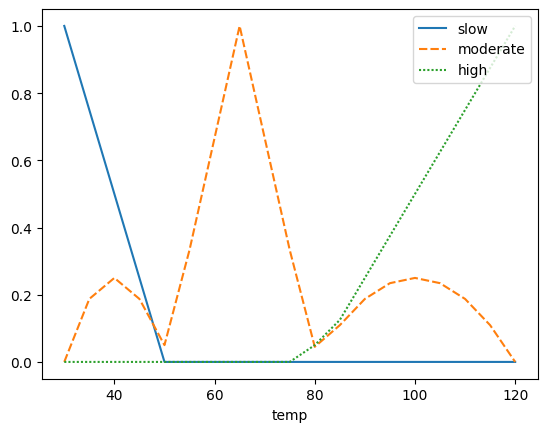

In [5]:
sns.lineplot(data=df)
plt.legend(loc='upper right')
plt.show()

In [6]:
def defuzzval(fs):
     ol=[]
     for speed in fs:
         s=speed['slow']
         m=speed['moderate']
         h=speed['high']
         dv = (s*100 + m*300 + h*500)/(s+m+h)
         ol.append(dv)
     return ol
defuzz = defuzzval(list1)
defuzz

[100.0,
 140.0,
 166.66666666666666,
 185.71428571428572,
 300.0,
 300.0,
 300.0,
 300.0,
 300.0,
 300.0,
 405.2631578947368,
 406.6666666666667,
 414.2857142857143,
 423.0769230769231,
 433.3333333333333,
 445.45454545454544,
 460.0,
 477.77777777777777,
 500.0]

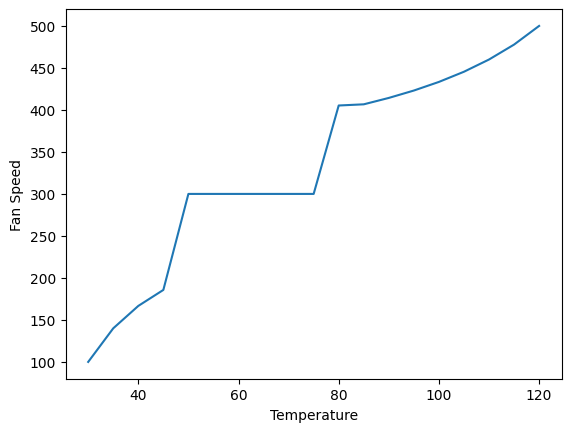

In [7]:
sns.lineplot(x=f,y=defuzz)
plt.xlabel('Temperature')
plt.ylabel('Fan Speed')
plt.show()

In [8]:
df2 = df.copy()
temp_mem=[]
attr = []
for temp in f:
    t,a = membership_temperature(temp)
    temp_mem.append(t)
    attr.append(a)
df2['temp_memership'] = temp_mem
df2['temp_attribute'] = attr
df2['defuzz_fspeed'] = defuzz
df2

,slow,moderate,high,temp_memership,temp_attribute,defuzz_fspeed
temp,,,,,,
30,1.00,0.000000,0.000,0.000000,excellent,100.000000
35,0.75,0.187500,0.000,0.250000,excellent,140.000000
40,0.50,0.250000,0.000,0.500000,excellent,166.666667
45,0.25,0.187500,0.000,0.750000,excellent,185.714286
50,0.00,0.050000,0.000,0.000000,average,300.000000
55,0.00,0.333333,0.000,0.166667,average,300.000000
60,0.00,0.666667,0.000,0.333333,average,300.000000
65,0.00,1.000000,0.000,0.500000,average,300.000000
70,0.00,0.666667,0.000,0.666667,average,300.000000


Thank You!